In [41]:
import pylab
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.patches as mpatches
#len(np.arange(0, .25, 0.00012))+len(np.arange(0.25+.00012, .55, 0.00012))
#len(np.arange(0, .55, 0.00012))
#x=[1,2,3,4]
#y=[1,2,3,4]
#x=np.array(x)-np.array(y)
#x
#The detuning that slows the atoms to the lowest theoretical
#value is δ_l = −γ/2

In [6]:
data='data for s1/2 to p3/2 transition 87 Rb'
amu=1.661*10**-27;
mu_b=9.74*10**-24;
k_b=1.381*10**-23;
e=1.602*10**-19;
m_e=9.109*10**-31;
mu_0=4*3.14*10**-7;
epsilon_0=8.854*10**-12;
h_c=1.055*10**-34;
h=6.626*10**-34;
c=2.998*10**8;
m_rb=87*amu;
decay=38.11*10**6;
lemda=780.032*10**-9;
life=26.24*10**-9;
i_sat=1.669;
f_goodness=.6;
v_recoil=(h_c*2*3.14)/(lemda*m_rb);
a_max=v_recoil*decay/2;

In [36]:
delta=np.arange(-80,80)
def goodness(s):
     f=s/(1+s+(2*delta*10**6/decay)**2)
     return np.array(f)
# plt.plot(delta,f)
# plt.grid()
# plt.title("Goodness factor for various detuning")
# plt.xlabel("Detuning Mhz")
# plt.ylabel("f, Goodness factor")
# plt.show()

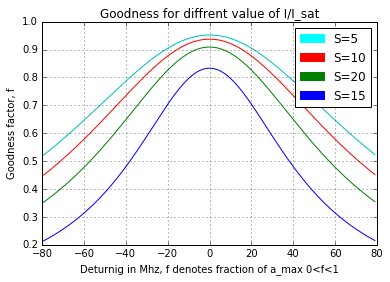

In [59]:
def plotfun(ax, x,s):
    return ax.plot(x,goodness(s))
fig, ax = plt.subplots(1,1)
l1 = plotfun(ax, delta,5)
l2 = plotfun(ax, delta,10)
l3 = plotfun(ax, delta,15)
l4 = plotfun(ax, delta,20)
plt.title("Goodness for diffrent value of I/I_sat")
plt.xlabel("Deturnig in Mhz, f denotes fraction of a_max 0<f<1")
plt.ylabel("Goodness factor, f")
red_patch = mpatches.Patch(color='red', label='S=10')
blue_patch = mpatches.Patch(color='blue', label='S=15')
green_patch = mpatches.Patch(color='green', label='S=20')
cyan_patch = mpatches.Patch(color='cyan', label='S=5')
plt.legend(handles=[cyan_patch, red_patch,green_patch,blue_patch],loc=1)
plt.grid()
plt.show()

slower length is  0.549017966618


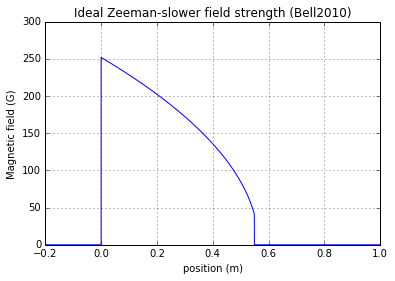

In [12]:
"""
Library to do Zeeman slower specific calculations
"""
from __future__ import division
import numpy as np

#### Dimensioned
mU = 1.667e-27 # Mass: Atomic Mass Unit
h = 6.626e-34
hbar = h / 2 / np.pi
# uprimehbar = 1.399e10 * 2 * np.pi
bohrmag = 9.27400915e-24
uprimehbar = bohrmag/hbar

#### Atom classes

class Rb85:
    """ Rubidium-85 atom parameters """
    def __init__(self):
        self.G = 38.117e6 # 2pi x 6.07MHz
        self.k = 1281654.9389 * 2 * np.pi # 1/m
        self.m = 85 * mU  # Rb85
        self.aslow = hbar*self.k*self.G/(2*self.m)

class Rb87:
    """ Rubidium-87 atom parameters """
    def __init__(self):
        self.G = 38.117e6 # 2pi x 6.07MHz
        self.k = 1281654.9389 * 2 * np.pi # 1/m
        self.m = 86.909180 * mU  # Rb85
        self.aslow = hbar*self.k*self.G/(2*self.m)

class Cs133:
    """ Cesium-133 atom parameters """
    def __init__(self):
        self.G = 32.889e6 # 2pi x 5.234MHz
        self.k = 1173230.7104 * 2 * np.pi # 1/m
        self.m = 132.905451 * mU  # Cs133
        self.aslow = hbar*self.k*self.G/(2*self.m)

class K41:
    """ Potassium-41 atom parameters """
    def __init__(self):
        self.G = 37.919e6 # 2pi x 6.035MHz
        self.k = 1304290.3375 * 2 * np.pi # 1/m (D2 line)
        self.m = 40.96182576 * mU  # K41
        self.aslow = hbar*self.k*self.G/(2*self.m)

#### Helper functions

def slowerlength(aslow, eta, v0, vf = 0):
    """
    Total length of Zeeman slower to slow atoms from a given initial
    velocity to a final one.

    aslow: constans decelartion
    eta: goodness factor (within [0, 1])
    v0: maximum capture velcoity
    vf: final velocity (optional, defaults to 0)
    """
    return (v0*v0 - vf*vf) / (2 * np.abs(aslow) * eta)


def bideal(atom, z, eta, v0, vf=0, detuning=0):
    """
    Calculate the ideal field of the zeeman slower

    atom: slowed atom, use the classes defined here, or something similar
    z: positions of query [m]
    v0: max captured velocity [m/s]
    vf: final velocity (defaults to 0) [m/s]
    detuning: laser detuning used [MHz], understood as red detuning

    Output:
    z < 0 : 0
    z > slowerlength : 0
    0 <= z <= slowerlength: calculated ideal slowing magnetic field 
    """
    # Can accept Numpy array, python list and single number, convert everything to numpy
    if type(z) != type(np.array([1])):
        if type(z) == type(1):
            z = np.array([z])
        elif type(z) == type([1]):
            z = np.array(z)
        else:
            raise TypeError('Input positions should be number, Python list or Numpy array')
    if not (0 < eta <= 1):
        raise ValueError('Efficiency has to be between 0 and 1')


    sl = slowerlength(atom.aslow, eta, v0, vf)
    detu = 2*np.pi*detuning*1e6 / uprimehbar

    # Filter z locations into three relevant regions
    z_pre = z<0
    z_post = z>sl
    z_mid = ~z_pre & ~z_post


    # Calculate field for the three regions
    b_pre = z[z_pre]*0
    b_post = z[z_post]*0
    b_mid = hbar*atom.k/bohrmag*np.sqrt(v0*v0 - 2 * eta * atom.aslow * z[z_mid]) - detu

    # Combine output
    res = np.append(b_pre, np.append(b_mid, b_post))
    return res

def bidealLs(atom, z, eta, sl, vf=0, detuning=0):
    """
    Calculate the ideal field of the zeeman slower

    atom: slowed atom, use the classes defined here, or something similar
    z: positions of query [m]
    v0: max captured velocity [m/s]
    vf: final velocity (defaults to 0) [m/s]
    detuning: laser detuning used [MHz], understood as red detuning

    Output:
    z < 0 : 0
    z > slowerlength : 0
    0 <= z <= slowerlength: calculated ideal slowing magnetic field
    """
    # Can accept Numpy array, python list and single number, convert everything to numpy
    if type(z) != type(np.array([1])):
        if type(z) == type(1):
            z = np.array([z])
        elif type(z) == type([1]):
            z = np.array(z)
        else:
            raise TypeError('Input positions should be number, Python list or Numpy array')
    if not (0 < eta <= 1):
        raise ValueError('Efficiency has to be between 0 and 1')

    detu = 2*np.pi*detuning*1e6 / uprimehbar

    v0 = np.sqrt(2 * sl * atom.aslow * eta + vf**2)

    # Filter z locations into three relevant regions
    z_pre = z<0
    z_post = z>sl
    z_mid = ~z_pre & ~z_post


    # Calculate field for the three regions
    b_pre = z[z_pre]*0
    b_post = z[z_post]*0
    b_mid = hbar*atom.k/bohrmag*np.sqrt(v0*v0 - 2 * eta * atom.aslow * z[z_mid]) - detu

    # Combine output
    res = np.append(b_pre, np.append(b_mid, b_post))
    return res


if __name__ == "__main__":
    import pylab as pl
    atom = Rb87()
    print "slower length is ",slowerlength(atom.aslow, 0.6, 275, 45)
    zl = np.linspace(-0.2, 1, 40001)
    bz = bideal(atom, zl, 0.6, 275, 45, 0)
    pl.plot(zl, bz*1e4)
    pl.title('Ideal Zeeman-slower field strength (Bell2010)')
    pl.xlabel('position (m)')
    pl.ylabel('Magnetic field (G)')

    
    pl.grid()
    pl.show()

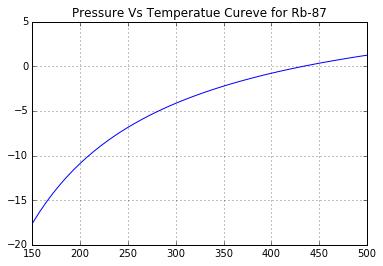

In [13]:
import numpy as np
T=np.linspace(150,500)
P=[9.318-4040/Ts for Ts in T]
np.array(P)
plt.plot(T, np.array(P))
plt.grid()
plt.title("Pressure Vs Temperatue Cureve for Rb-87")
plt.show()

In [14]:
atom87 = Rb87()
aslow = atom87.aslow

In [15]:
import numpy as np
def slowerlength(aslow, eta, v0, vf = 0):
    """
    Total length of Zeeman slower to slow atoms from a given initial
    velocity to a final one.

    aslow: constans decelartion
    eta: goodness factor (within [0, 1])
    v0: maximum capture velcoity
    vf: final velocity (optional, defaults to 0)
    """
    return (v0*v0 - vf*vf) / (2 * np.abs(aslow) * eta)

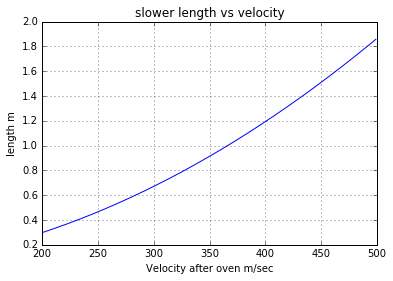

In [16]:
i=0;
v=[]
for x in range(200,500):
    v.append(slowerlength(aslow,0.6,x))
plt.plot(range(200, 500), v)
plt.title("slower length vs velocity")
plt.ylabel("length m")
plt.xlabel("Velocity after oven m/sec")
plt.grid()
plt.show()

In [17]:
x = range(200,500)
x[190]

390

In [22]:
k = 2*np.pi/(780*10**-9)
print "2*pi/lembda = ",k
#### Dimensioned
mU = 1.667e-27 # Mass: Atomic Mass Unit
h = 6.626e-34
hbar = h / 2 / np.pi
# uprimehbar = 1.399e10 * 2 * np.pi
bohrmag = 9.27400915e-24
uprimehbar = bohrmag/hbar

2*pi/lembda =  8055365.77844


In [23]:
def vfunction(sl, atom, v_init,f):
    zs = np.arange(0, sl, 0.00012)
    vs = [np.sqrt(v_init**2 -2*atom.aslow*f*zv) for zv in zs]
    return np.array(vs)

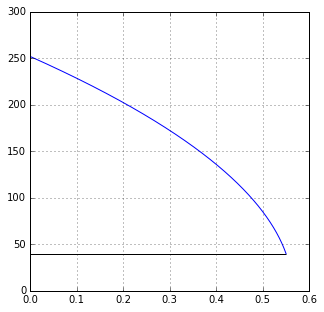

In [24]:
vees = vfunction(.55, atom87,275, 0.6)
bees = (k/uprimehbar)*vees
zs = np.arange(0, .55, 0.00012)
plt.figure(figsize=(5,5))
plt.plot(zs, bees*10**4)
plt.hlines(bees[-1]*10**4, 0,.55)
plt.grid()

In [115]:
import numpy as np
def mag_val(x_i,x_f,j,r):
    z = np.arange(x_i, x_f, 0.00012)
    bb=[(mu_0*j/2)*((zp-x_i)/np.sqrt(r*r+(zp-x_i)**2)-(zp-x_f)/np.sqrt(r*r+(zp+x_f)**2)) for zp in z]
    #z=np.arange(x_f+.00012,0.55,0.00012)
    #[bb.append(0) for zp in z]
    return np.array(bb)

def mag_val_strt(x_i,x_f,j,r):
    z = np.arange(x_i, x_f, 0.00012)
    bb=[(mu_0*j/2)*((zp-x_i)/np.sqrt(r*r+(zp-x_i)**2)-(zp-x_f)/np.sqrt(r*r+(zp+x_f)**2)) for zp in z]
    z=np.arange(x_f+.00012,0.55,0.00012)
    [bb.append(0) for zp in z]
    return np.array(bb)

def mag_val_end(x_i,x_f,j,r):
    z=np.arange(x_i+.00012,x_f,0.00012)
    bb=[(mu_0*j/2)*((zp-x_i)/np.sqrt(r*r+(zp-x_i)**2)-(zp-x_f)/np.sqrt(r*r+(zp+x_f)**2)) for zp in z]
    z = np.arange(0,x_i, 0.00012)
    [bb.insert(0,0.0001) for zp in z]
    return np.array(bb) 


In [116]:
def mag_calulator(x_i,x_f,r,j,z):
    b_z=[(mu_0*j/2)*((zp-x_i)/np.sqrt(r*r+(zp-x_i)**2)-(zp-x_f)/np.sqrt(r*r+(zp+x_f)**2)) for zp in z]
    return np.array(b_z)


In [245]:
def coil_winding0(a1,a2,a3,a4,b1,b2,b3):
    z1=np.arange(0,.55,0.00012)
    b_z1=mag_calulator(0,a1,2.06,4567,z1)
    #z10=np.arange(a1,.55,0.00012)
    #a=[0]*len(z10)
    #b_z1=np.append(b_z1,a)
    
    z2=np.arange(0,a2,0.00012)
    b_z2=mag_calulator(0,a2,2.04,4567,z1)
    #z20=np.arange(a2,.55,0.00012)
    #a=[0]*len(z20)
    #b_z2=np.append(b_z2,a)
    
    z3=np.arange(0,a3,0.00012)
    b_z3=mag_calulator(0,a3,2.02,4567,z1)
    #z30=np.arange(a3,.55,0.00012)
    #a=[0]*len(z30)
    #b_z3=np.append(b_z3,a)
    
    z4=np.arange(0,a4,0.00012)
    b_z4=mag_calulator(0,a4,2,4567,z1)
    #z40=np.arange(a4,.55,0.00012)
    #a=[0]*len(z40)
    #b_z4=np.append(b_z4,a)
    
    x1=np.arange(b1,0.55,0.00012)
    b_x1=mag_calulator(0,b1,2,-2567,z1)
    #x10=np.arange(b1,.55,0.00012)
    #a=[0]*len(x10)
    #b_x1=np.append(a,b_x1)
    
    x2=np.arange(b2,.55,0.00012)
    b_x2=mag_calulator(b2,0.55,2.02,-2567,z1)
    #x20=np.arange(0,b2,0.00012)
    #a=[0]*len(x20)
    #b_x2=np.append(a,b_x2)
    
    x3=np.arange(b3,.55,0.00012)
    b_x3=mag_calulator(b3,.55,2.04,-12567,z1)
    #x30=np.arange(0,b3,0.00012)
    #a=[0]*len(x30)
    #b_x3=np.append(a,b_x3)
    
    return np.array(b_z1)+np.array(b_z2)+np.array(b_z3)+np.array(b_z4)+np.array(b_x1)+np.array(b_x2)+np.array(b_x3)
    

#     print len(z1)+len(z10)
#     print len(z2)+len(z20)
#     print len(z3)+len(z30)
#     print len(z4)+len(z40)
#     print len(x1)+len(x10)
#     print len(x2)+len(x20)
#     print len(x3)+len(x30)
#     print len(b_z1)
#     print len(b_z2)
#     print len(b_z3)
#     print len(b_z4)
#     print len(b_x1)
#     print len(b_x2)
#     print len(b_x3)
#     print b_x3
    

In [246]:
def coil_winding(a1,a2,a3,a4,b1,b2,b3):
    x1=np.arange(b1,0.55,0.00012)
    b_x1=mag_calulator(0,a1,2,4567,x1)
    x10=np.arange(b1,.55,0.00012)
    a=[0]*len(x10)
    b_x1=np.append(a,b_x1)
    print b_x1

In [238]:
coil_winding0(.07,.12,.15,.24,.26,.36,.42)

array([ 0.00162151,  0.00162147,  0.00162144, ...,  0.0016771 ,
        0.00167715,  0.0016772 ])

TypeError: an integer is required for the axis

In [247]:

zs1 = np.arange(0, .55, .00012)
bb= mag_val(0,.55,15936.5,.002)
#plt.plot(zs1, bb*10**4)
#plt.grid()

zs1 = np.arange(0, .55, .00012)
bb2= coil_winding0(.1,.2,.25,.4,.45,.5,.52)
#plt.plot(zs1, bb2*10**4)
#plt.grid()
#bb2

b_obtain=bees*10**4
bb_obtain=bb*10**4
bb1_obtain=bb1*10**4
bb2_obtain=bb2*10**4
b_obtain=np.array(b_obtain)-np.array(bb_obtain)-np.array(bb1_obtain)-np.array(bb2_obtain)
zs1 = np.arange(0, .55, 0.00012)
plt.plot(zs1, b_obtain)
plt.grid()
plt.title("Error in B as a function of z")
plt.ylabel("Diffrenec in magnetic feild : actual vs exp")
pl

SyntaxError: invalid syntax (<ipython-input-247-40a95fd9d8c6>, line 22)

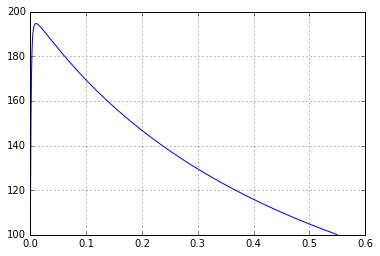

In [75]:
zs1 = np.arange(0, .55, .00012)
bb= mag_val(0,.55,15936.5,.002)
plt.plot(zs1, bb*10**4)
plt.grid()

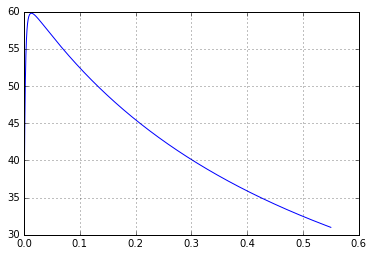

In [76]:
zs1 = np.arange(0, .55, .00012)
bb1= mag_val_strt(0,.55,4936.5,.003)
plt.plot(zs1, bb1*10**4)
plt.grid()

array([ 0.0001    ,  0.0001    ,  0.0001    , ..., -0.00184443,
       -0.00184423, -0.00184403])

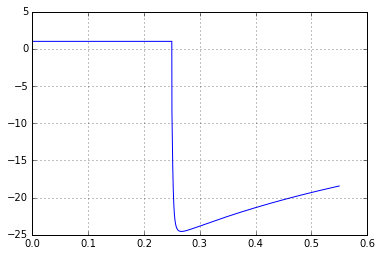

In [77]:
zs1 = np.arange(0, .55, .00012)
bb2= mag_val_end(0.25,.55,-2936.5,.003)
plt.plot(zs1, bb2*10**4)
plt.grid()
bb2

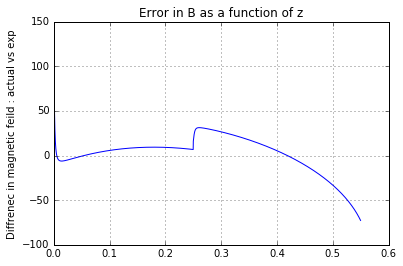

In [78]:
b_obtain=bees*10**4
bb_obtain=bb*10**4
bb1_obtain=bb1*10**4
bb2_obtain=bb2*10**4
b_obtain=np.array(b_obtain)-np.array(bb_obtain)-np.array(bb1_obtain)-np.array(bb2_obtain)
zs1 = np.arange(0, .55, 0.00012)
plt.plot(zs1, b_obtain)
plt.grid()
plt.title("Error in B as a function of z")
plt.ylabel("Diffrenec in magnetic feild : actual vs exp")
plt.show()

In [30]:
s=5;
delta=np.arange(-50,50)
f=s/(1+s+(2*delta*10**6/decay)**2)

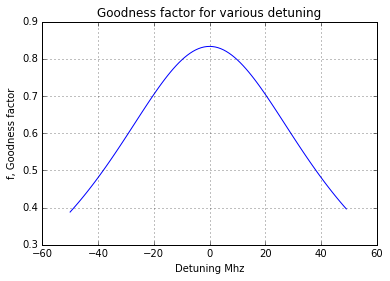

In [31]:
def goodness(s):
    delta=np.arange(-50,50)
    f=s/(1+s+(2*delta*10**6/decay)**2)
    return np.array(f)
plt.plot(delta,f)
plt.grid()
plt.title("Goodness factor for various detuning")
plt.xlabel("Detuning Mhz")
plt.ylabel("f, Goodness factor")
plt.show()

In [32]:
# f_plot, axarr = plt.subplots(2, 2)
# #plt.figure(figsize=(50,50))
# axarr[0, 0].plot(delta,f)
# axarr[0, 0].set_title('Axis [0,0]')
# axarr[0, 1].plot(delta,goodness(10))
# axarr[0, 1].set_title('Axis [0,1]')
# axarr[1, 0].plot(delta,goodness(15))
# axarr[1, 0].set_title('Axis [1,0]')
# axarr[1, 1].plot(delta, goodness(20))
# axarr[1, 1].set_title('Axis [1,1]')

# plt.show()

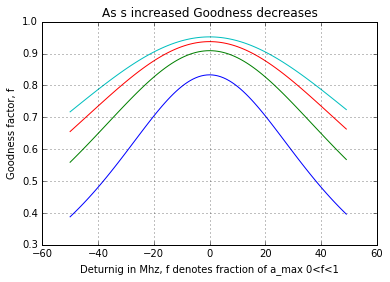

In [33]:
def plotfun(ax, x,s):
    return ax.plot(x,goodness(s))
fig, ax = plt.subplots(1,1)
l1 = plotfun(ax, delta,5)
l2 = plotfun(ax, delta,10)
l3 = plotfun(ax, delta,15)
l4 = plotfun(ax, delta,20)
plt.title("As s increased Goodness decreases")
plt.xlabel("Deturnig in Mhz, f denotes fraction of a_max 0<f<1")
plt.ylabel("Goodness factor, f")
plt.grid()
plt.show()

In [231]:
x=[1,2,3]
y=[2,4,5]

In [233]:
np.array(x)+np.array(y)
    

array([3, 6, 8])